# Figure 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import scipy.stats as sp
import importlib

import replay_structure.metadata as meta
import replay_structure.read_write as read_write

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
summary_df = read_write.load_descriptive_stats(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function, ext='')
summary_df = summary_df[~np.isnan(summary_df['avg_fr'])] # ripples that don't have any data for
temporal_df = summary_df[summary_df['trajectory_model']==True]

In [4]:
print("# SWRs classified as trajectories: ", np.sum(summary_df['trajectory_model']))
print("# SWRs previously classified: ", np.sum(summary_df['map_classified_PF']))

# SWRs classified as trajectories:  2366.0
# SWRs previously classified:  692.0


## Main text 

t(-7.2405), corrected p-value 1.8052570517479177e-12
t(-6.4354), corrected p-value 4.4569056301560444e-10
t(-7.3296), corrected p-value 9.462202988338819e-13
t(-2.8596), corrected p-value 0.01283702592631316
AWAY = NOT HOME
degrees of freedom=2366


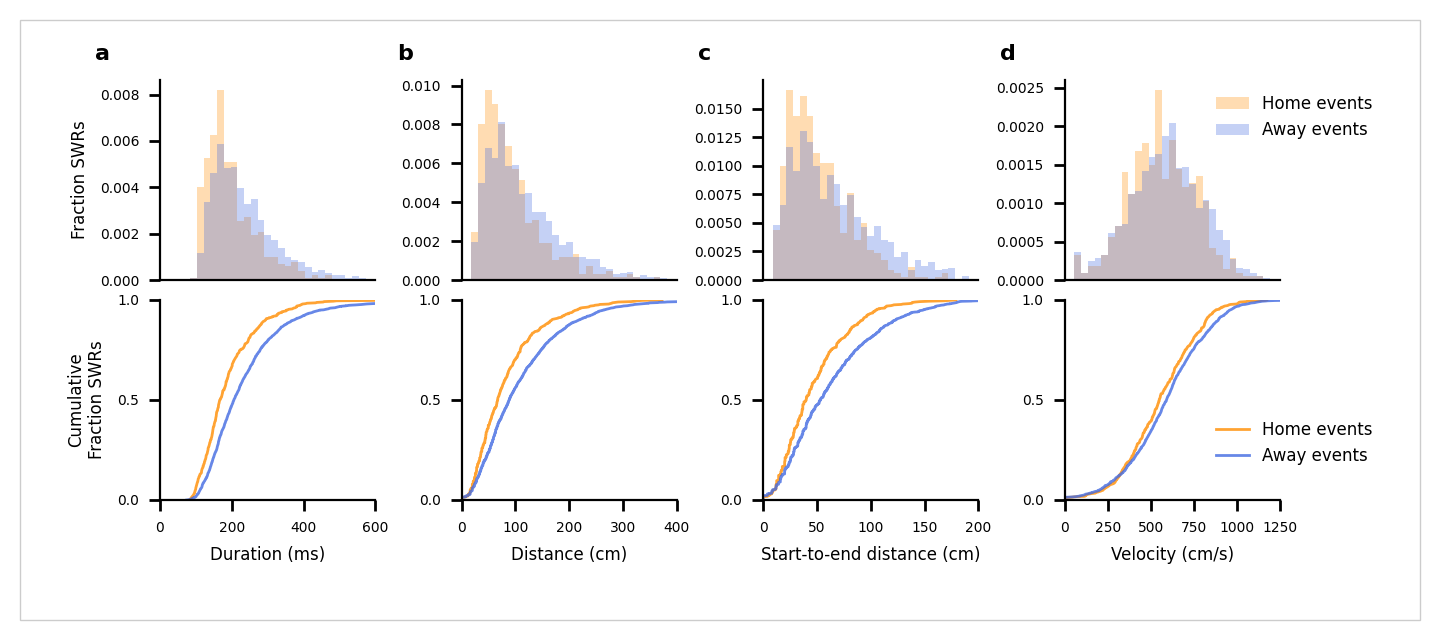

In [5]:
figure_width = 7
figure_height = 3
fig, ax = plt.subplots(2,4,figsize=(figure_width,figure_height), dpi=200)
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.1)
colors = ['darkorange', 'royalblue'] #['green', 'purple']

stats_plot = ['duration_ms', 'distance_cm', 'direct_distance_cm', 'velocity_cm_s']
stats_plot_names = ['Duration (ms)', 'Distance (cm)', 'Start-to-end distance (cm)', 'Velocity (cm/s)']
max_stat = [600, 400, 200, 1250]

for i, stat in enumerate(stats_plot):
    bins = np.linspace(0, max_stat[i],30)
    
    for j, location_type in enumerate(['Home events', 'Away events']):
        if location_type == 'Home events':
            ax[0,i].hist(temporal_df[stat][temporal_df['current_location_type'] == 'home'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (temporal_df['current_location_type'] == 'home').sum()

            ax[1,i].plot(np.sort(temporal_df[stat][temporal_df['current_location_type'] == 'home']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
        elif location_type == 'Away events':
            ax[0,i].hist(temporal_df[stat][temporal_df['current_location_type'] != 'home'], bins=bins, density=True, color=colors[j], alpha=.3, label=location_type)
            total = (temporal_df['current_location_type'] != 'home').sum()

            ax[1,i].plot(np.sort(temporal_df[stat][temporal_df['current_location_type'] != 'home']), np.arange(total)/(total-1), color=colors[j], alpha=.8, label=location_type,
                        linewidth=1)
    stats_results = sp.ttest_ind(temporal_df[stat][temporal_df['current_location_type'] == 'home'],
                     temporal_df[stat][temporal_df['current_location_type'] != 'home'])
    print(f't({stats_results[0].round(4)}), corrected p-value {stats_results[1]*3}')
    ax[1,i].set_xlabel(stats_plot_names[i])
    ax[0,i].tick_params(direction='out', length=4, width=1)
    ax[1,i].tick_params(direction='out', length=4, width=1)
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['right'].set_linewidth(False)
    ax[1,i].spines['top'].set_visible(False)
    ax[1,i].spines['right'].set_linewidth(False)
    ax[1,i].set_xlim([0,max_stat[i]])
    ax[1,i].set_ylim([0,1])
    ax[1,i].set_yticks(np.linspace(0,1,3))
    ax[0,i].set_xticks([])
    if i ==(len(stats_plot)-1):
        ax[1,i].legend(frameon=False, loc=4, bbox_to_anchor=(1.5,0.1,0,0))
        ax[0,i].legend(frameon=False, loc=1, bbox_to_anchor=(1.5,1,0,0))
    if i == 0:
        ax[1,i].set_ylabel('Cumulative\nFraction SWRs')
        ax[0,i].set_ylabel('Fraction SWRs')

# for i in range(4):
ax[0,0].text(-.3,1.1, "a", size=8, transform=ax[0,0].transAxes, fontweight='bold')
ax[0,1].text(-.3,1.1, "b", size=8, transform=ax[0,1].transAxes, fontweight='bold')
ax[0,2].text(-.3,1.1, "c", size=8, transform=ax[0,2].transAxes, fontweight='bold')
ax[0,3].text(-.3,1.1, "d", size=8, transform=ax[0,3].transAxes, fontweight='bold')
    
plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure6.svg"), dpi=500, transparent=True)

# visualize figure edge
rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

print('AWAY = NOT HOME')
print(f"degrees of freedom={(temporal_df['current_location_type'] == 'home').sum() + (temporal_df['current_location_type'] != 'home').sum()}")

plt.show()